In [12]:
# PCA
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [13]:
data = np.array([
    [2.7, 2.4, 0.5],
    [0.5, 0.7, 2.2],
    [2.2, 2.9, 2.9],
    [1.9, 2.2, 3.1]
])

print("Orignal Data: \n", data)

Orignal Data: 
 [[2.7 2.4 0.5]
 [0.5 0.7 2.2]
 [2.2 2.9 2.9]
 [1.9 2.2 3.1]]


In [14]:
mean = np.mean(data, axis = 0)
std_dev = np.std(data, axis = 0, ddof = 1)
z = (data - mean)/std_dev
print("Standardized Data: \n", z)

Standardized Data: 
 [[ 0.92793267  0.36961751 -1.41774469]
 [-1.40515519 -1.42566752  0.02116037]
 [ 0.39768543  0.89764251  0.61365069]
 [ 0.07953709  0.1584075   0.78293363]]


In [15]:
cov_matrix = np.cov(z.T)
print("Covariance Matrix: \n", cov_matrix)

Covariance Matrix: 
 [[ 1.          0.90528097 -0.34633101]
 [ 0.90528097  1.          0.04022353]
 [-0.34633101  0.04022353  1.        ]]


In [16]:
eigenvalues, eigenvectors =  np.linalg.eig(cov_matrix)
print("\nEigen values: \n", eigenvalues)
print("\nEigen vectors: \n", eigenvectors)


Eigen values: 
 [0.01676598 1.95641253 1.02682149]

Eigen vectors: 
 [[-0.70187417  0.71162889 -0.03093501]
 [ 0.65744212  0.66392059  0.35634157]
 [-0.27412135 -0.22976897  0.93384351]]


In [17]:
sorted_index = np.argsort(eigenvalues)[::-1]
eigenvalues = eigenvalues[sorted_index]
eigenvectors = eigenvectors[:, sorted_index]
print("\n Sorted Eigen Values: \n", eigenvalues)
print("\n Sorted Eigen Vectors: \n", eigenvectors)


 Sorted Eigen Values: 
 [1.95641253 1.02682149 0.01676598]

 Sorted Eigen Vectors: 
 [[ 0.71162889 -0.03093501 -0.70187417]
 [ 0.66392059  0.35634157  0.65744212]
 [-0.22976897  0.93384351 -0.27412135]]


In [19]:
W = eigenvectors[:, :2]  
Z_pca = z.dot(W)
print("\nProjected Data (2D):\n", Z_pca)


Projected Data (2D):
 [[ 1.2314941  -1.22094721]
 [-1.95134104 -0.44479564]
 [ 0.7379699   0.88061865]
 [-0.01812296  0.78512419]]


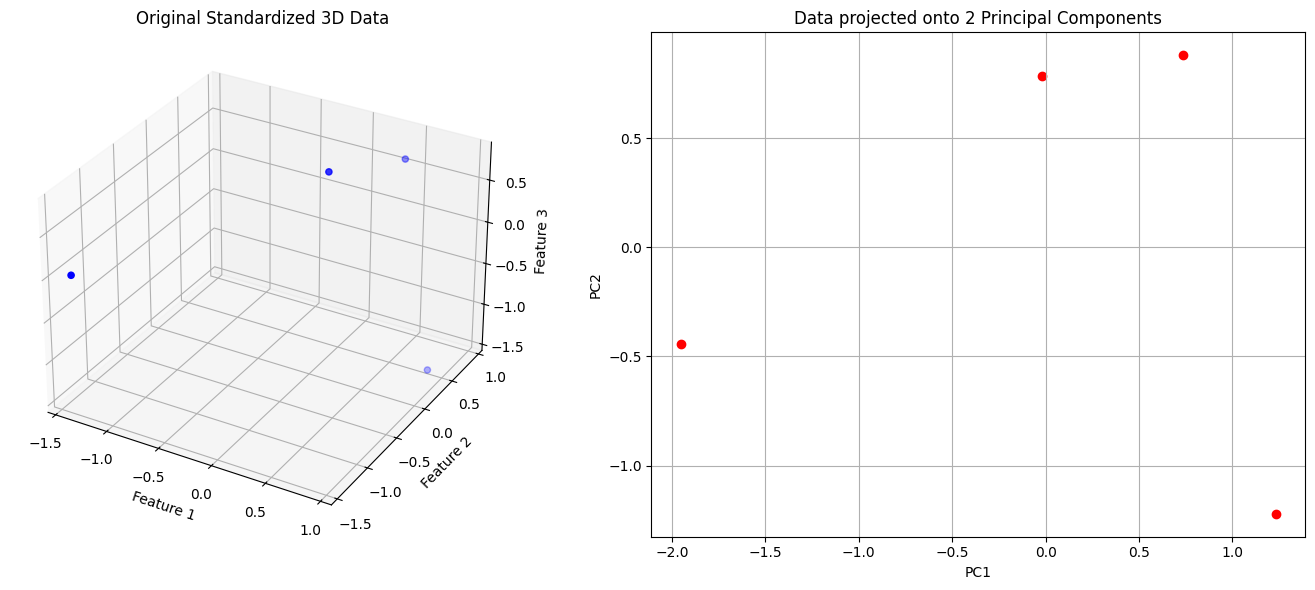

In [21]:
fig = plt.figure(figsize=(14,6))
ax1 = fig.add_subplot(121, projection='3d')
ax1.scatter(z[:, 0], z[:, 1], z[:, 2], color='blue')
ax1.set_title("Original Standardized 3D Data")
ax1.set_xlabel("Feature 1")
ax1.set_ylabel("Feature 2")
ax1.set_zlabel("Feature 3")
ax2 = fig.add_subplot(122)
ax2.scatter(Z_pca[:, 0], Z_pca[:, 1], color='red')
ax2.set_title("Data projected onto 2 Principal Components")
ax2.set_xlabel("PC1")
ax2.set_ylabel("PC2")
ax2.grid(True)
plt.tight_layout()
plt.show()